<a href="https://colab.research.google.com/github/GustavoARodri/NeuralNetworkEvolution/blob/main/EvolutionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Evolution_data.csv")
df.head(5)

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape         

In [4]:
#Dummied every object except the target(Genus_&_Specie)
df_dummied = pd.get_dummies(df[['Location', 'Zone', 'Current_Country', 'Habitat', 'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position'
, 'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet','Sexual_Dimorphism','Hip','Vertical_Front','Anatomy'
, 'Migrated', 'Skeleton']])

In [5]:
#In this new Dataframe that got dummied, i put new columns or a copy from the original dataframe, Time, Cranial_Capacity, Height and Genus_&_Specie
df_dummied['Time'] = df['Time']
df_dummied['Cranial_Capacity'] = df['Cranial_Capacity']
df_dummied['Height'] = df['Height']
df_dummied['Genus_&_Specie'] = df['Genus_&_Specie']

In [6]:
#A new total of 104 Columns
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Columns: 104 entries, Location_Africa to Genus_&_Specie
dtypes: float64(3), object(1), uint8(100)
memory usage: 1.5+ MB


In [7]:
#Mapping the target to numbers, 0-23, with this the model can train correctly
mapp = {'hominino Orrorin tugenencin': 0, 'hominino Ardipithecus ramidus / kabadda': 1, 'Australopithecus Afarensis': 2, 'Australopithecus Anamensis': 3,
              'Australopithecus Africanus': 4, 'Homo Rodhesiensis': 5,
              'hominino Sahelanthropus tchadensis': 6, 'Homo Neanderthalensis\n': 7,
              'Paranthropus Aethiopicus': 8, 'Homo Erectus': 9, 'Homo Naledi': 10,
              'Homo Floresiensis': 11, 'Paranthropus Boisei': 12, 'Homo Rudolfensis': 13,
              'Homo Habilis': 14, 'Homo Sapiens': 15, 'Homo Antecesor': 16, 'Homo Ergaster': 17,
              'Australopithecus Sediba': 18, 'Homo Georgicus': 19,
              'Australopithecus Bahrelghazali': 20, 'Australopithecus Garhi': 21,
              'Paranthropus Robustus': 22, 'Homo Heidelbergensis': 23}

In [8]:
#New Mapping on Genus_&_Specie
df_dummied['Genus_&_Specie'] = df['Genus_&_Specie'].map(mapp)
print(df_dummied['Genus_&_Specie'])

0         0
1         1
2         2
3         3
4         4
         ..
11995     4
11996     4
11997    11
11998     8
11999    22
Name: Genus_&_Specie, Length: 12000, dtype: int64


In [9]:
#This will be for the implementation of the model with new datas, i just make the columns in the right places, you will see later
copied_df = df.copy()
col = ['Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton', 'Time', 'Cranial_Capacity', 'Height']

copied_df = copied_df[col]

copied_df['Cranial_Capacity1'] = df['Cranial_Capacity']
copied_df['Height1'] = df['Height']

col_to_exclude = ['Cranial_Capacity', 'Height']
copied_df.drop(columns=col_to_exclude, inplace=True)

In [10]:
X = df_dummied.drop('Genus_&_Specie', axis=1)
y = df_dummied['Genus_&_Specie']

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
#Shuffle its important here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [13]:
#One-Hot Encoder to our model can predict in various categories
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
#Deep Network Creation
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='softmax'))

In [16]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3328      
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
Total params: 4720 (18.44 KB)
Trainable params: 4720 (18.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
300/300 [==============================] - 2s 3ms/step - loss: 6.2062 - accuracy: 0.3086 - val_loss: 1.4101 - val_accuracy: 0.6458
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.9470 - accuracy: 0.8138 - val_loss: 0.4869 - val_accuracy: 0.9688
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3092 - accuracy: 0.9722 - val_loss: 0.1885 - val_accuracy: 0.9846
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1052 - accuracy: 0.9908 - val_loss: 0.0619 - val_accuracy: 0.9983
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9981 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000

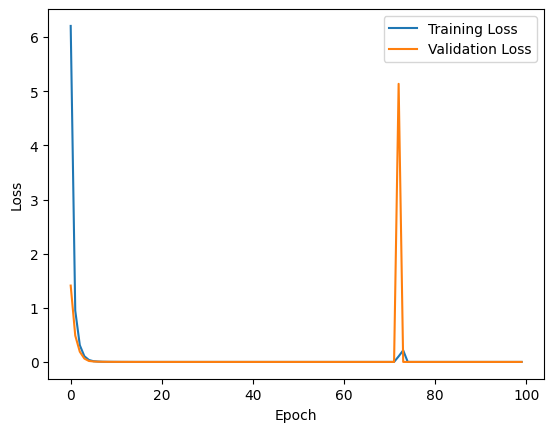

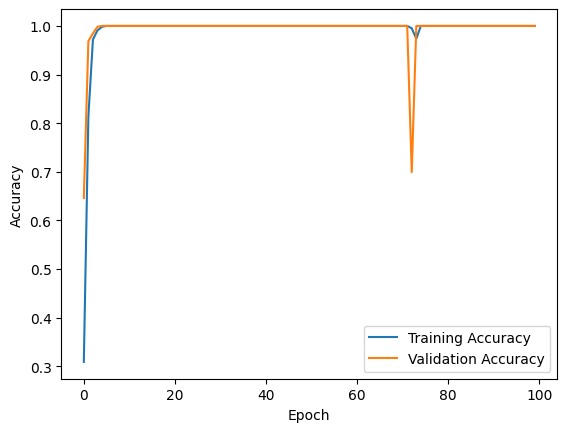

In [18]:
#Histogram + Training model
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Accuracy on the test:', accuracy)

75/75 [==============================] - 0s 2ms/step - loss: 4.3248e-07 - accuracy: 1.0000
Accuracy on the test: 1.0


In [20]:
#New data to test our model randomized, i combined this data with copied_df, to make another dummies.
new_data = ['Africa', 'oriental', 'Indonesia', 'savannah', 'small', 'conical', 'ultra protruding', 'reduced',
            'modern', 'small', 'incisiform', 'very thick', 'no', 'no', 'yes', 'manipulate', 'walk', 'hard fruits', 'high','wide','no','old','no',
            'robust',4.38390951, 208.28047, 122.90488]
new_data_df = pd.DataFrame([new_data], columns=copied_df.columns)
df_combined = pd.concat([copied_df, new_data_df], ignore_index=True)

In [21]:
#Getting the dummies of the new data
copy_dummied = pd.get_dummies(df_combined[['Location', 'Zone', 'Current_Country', 'Habitat', 'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position'
, 'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet','Sexual_Dimorphism','Hip','Vertical_Front','Anatomy'
, 'Migrated', 'Skeleton']])

In [22]:
#Here i create 3 columns with these 3 atributs to complete our new dataframe
copy_dummied['Time'] = df_combined['Time']
copy_dummied['Cranial_Capacity1'] = df_combined['Cranial_Capacity1']
copy_dummied['Height1'] = df_combined['Height1']

In [23]:
#Here i remove the size of our old data to only get the new data
copy_dummied = copy_dummied.iloc[len(copied_df):]

In [24]:
#The new data with dummies and right order of columns
copy_dummied

,Location_Africa,Location_Asia,Location_Europa,Zone_central,Zone_oriental,Zone_south,Zone_west,Current_Country_Ethiopia,Current_Country_Georgia,Current_Country_Germany,...,Anatomy_old,Anatomy_very modern,Migrated_no,Migrated_yes,Skeleton_light,Skeleton_refined,Skeleton_robust,Time,Cranial_Capacity1,Height1
12000,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,4.38391,208.28047,122.90488


In [25]:
#Making the predictions and putting the name in the right indexes
df_index_Genus = df['Genus_&_Specie'].drop_duplicates()

predictions = model.predict([copy_dummied])

probabilities = predictions[0]

output = []

for index, prob in enumerate(probabilities):
    if df_index_Genus.iloc[index] == 'Homo Neanderthalensis\n':
      output.append(f'Homo Neanderthalensis: {prob*100:.2f}%\n')
    else:
      species_name = df_index_Genus.iloc[index]
      output.append(f'{species_name}: {prob*100:.2f}%\n')

print(' '.join(output))

1/1 [==============================] - 0s 93ms/step
hominino Orrorin tugenencin: 0.04%
 hominino Ardipithecus ramidus / kabadda: 38.42%
 Australopithecus Afarensis: 3.41%
 Australopithecus Anamensis: 0.00%
 Australopithecus Africanus: 0.00%
 Homo Rodhesiensis: 0.00%
 hominino Sahelanthropus tchadensis: 2.61%
 Homo Neanderthalensis: 0.05%
 Paranthropus Aethiopicus: 2.90%
 Homo Erectus: 0.00%
 Homo Naledi: 0.00%
 Homo Floresiensis: 0.00%
 Paranthropus Boisei: 0.03%
 Homo Rudolfensis: 0.01%
 Homo Habilis: 0.00%
 Homo Sapiens: 0.00%
 Homo Antecesor: 0.00%
 Homo Ergaster: 0.00%
 Australopithecus Sediba: 0.03%
 Homo Georgicus: 0.00%
 Australopithecus Bahrelghazali: 50.77%
 Australopithecus Garhi: 0.18%
 Paranthropus Robustus: 1.54%
 Homo Heidelbergensis: 0.00%



The model is a little bit confused here because i just shuffled everything, but with real data he can predict with 100%